<a href="https://colab.research.google.com/github/Big-NG/OOU_CSC309_Artificial_Intelligence/blob/main/notebooks/CSC309_Week04_Astar_CA1_Student_Centred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC309 – Artificial Intelligence  
**Week 4 Lab:** Heuristic Search (A*) — Continuous Assessment 1

**Instructor:** Dr Sakinat Folorunso  

**Title:** Associate Professor of AI Systems and FAIR Data **Department:** Computer Sciences, Olabisi Onabanjo University, Ago-Iwoye, Ogun State, Nigeria

**Course Code:** CSC 309

**Mode:** Student‑centred, hands‑on in Google Colab

> Every code cell is commented line‑by‑line so you can follow the logic precisely.

## How to use this notebook
1. Start with the **Group Log** and **Do Now**.  
2. Run the **Setup** cell once.  
3. Work through **Tasks**. Edit only cells marked **`# TODO(Student)`**.  
4. Use **Quick Checks** to test your understanding.  
5. Finish with the **Reflection**. If you finish early, try the **Extensions**.

In [8]:
#@title 🧑🏽‍🤝‍🧑🏾 Group Log (fill before you start)
# The '#@param' annotations create form fields in Colab for easy input.

group_members = " Ngozi Favour Ugbeh, Oke Adeoluwa Jacob, Akintayo Haleem Opeyemi, Boluwatife Daniel Babalola, Ozakpolor Gift, Sulaimon Ridwan Adebowale, Akinyele Kausarat Ayomide, Oluwole Bolaji Alfred, Banjo Ayooluwa Esther, Bakre Sulaimon Opeyemi."  #@param {type:"string"}  # Names of teammates
roles_notes = "Implemented A* on a grid with Manhattan and Euclidean heuristics, then compared their explored-node counts across random maps to reflect on completeness, optimality, time, and space."  #@param {type:"string"}  # Short working notes

print("👥 Group:", group_members)        # Echo the group list for confirmation
print("📝 Notes:", roles_notes)          # Echo the notes so they're preserved in output

👥 Group:  Ngozi Favour Ugbeh, Oke Adeoluwa Jacob, Akintayo Haleem Opeyemi, Boluwatife Daniel Babalola, Ozakpolor Gift, Sulaimon Ridwan Adebowale, Akinyele Kausarat Ayomide, Oluwole Bolaji Alfred, Banjo Ayooluwa Esther, Bakre Sulaimon Opeyemi.
📝 Notes: Implemented A* on a grid with Manhattan and Euclidean heuristics, then compared their explored-node counts across random maps to reflect on completeness, optimality, time, and space.


### Learning Objectives
- Implement **A\*** on grid maps.  
- Design and justify **admissible** heuristics.  
- Measure explored nodes vs. heuristic choice.

In [1]:
#@title 🔧 Setup
# Install (if needed) and import minimal libraries.
import sys, subprocess                                           # System + pip access
def pip_install(pkgs):
    for p in pkgs:
        try: __import__(p.split("==")[0])                        # Try to import
        except Exception:
            subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", p])  # Otherwise install
pip_install(["numpy", "matplotlib"])                             # NumPy + Matplotlib are sufficient

import numpy as np                                               # For grid generation
import heapq                                                     # For the A* priority queue
import math                                                      # For Euclidean distance
import matplotlib.pyplot as plt                                  # For plotting

print("✅ Setup complete for Week 4.")

✅ Setup complete for Week 4.


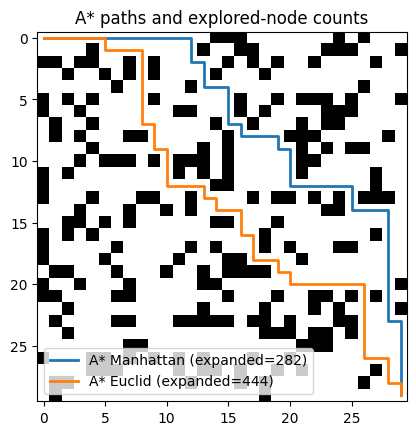

In [3]:
#@title ⭐ A* on a grid (fully commented)

def astar(grid, start, goal, h):
    """A* search on a 4‑connected grid.
    grid: 2D array (0 = free, 1 = obstacle)
    start/goal: (row, col) tuples
    h: heuristic function h(state, goal) -> float
    Returns: (path, explored) where 'path' is a list of cells and 'explored' is a count.
    """
    n, m = grid.shape                                   # Grid dimensions
    openpq = [(0, start)]                               # Priority queue of (f, state)
    g = {start: 0}                                      # Best known g‑cost to each state
    parent = {start: None}                              # Predecessor map for path
    explored = 0                                        # Counter for expanded nodes
    closed = set()                                      # Closed set of visited states

    while openpq:                                       # Continue while there are candidates
        f, s = heapq.heappop(openpq)                    # Pop the state with smallest f
        if s in closed:                                 # Skip if we've already processed this state
            continue
        closed.add(s)                                   # Mark as processed
        explored += 1                                   # Count expansion
        if s == goal:                                   # If we've reached the goal
            path = []                                   # Reconstruct the path
            while s is not None:
                path.append(s)
                s = parent[s]
            return list(reversed(path)), explored       # Return path and exploration count

        x, y = s                                        # Unpack current coordinates
        for dx, dy in [(1,0),(-1,0),(0,1),(0,-1)]:      # Explore 4 neighbors
            nx, ny = x + dx, y + dy                     # Neighbor coordinates
            if 0 <= nx < n and 0 <= ny < m and grid[nx, ny] == 0:  # Legal and free?
                ng = g[s] + 1                           # Unit step cost to move to neighbor
                if ng < g.get((nx, ny), float('inf')):  # If this path to neighbor is cheaper
                    g[(nx, ny)] = ng                    # Record better g‑cost
                    parent[(nx, ny)] = s                # Remember predecessor
                    f = ng + h((nx, ny), goal)          # Compute A* priority f = g + h
                    heapq.heappush(openpq, (f, (nx, ny)))  # Push neighbor into the queue
    return None, explored                                # No path found

def manhattan(a, b):
    """Admissible heuristic for 4‑connected grid: |dx| + |dy|."""
    return abs(a[0]-b[0]) + abs(a[1]-b[1])             # Manhattan distance never overestimates

def euclid(a, b):
    """Admissible (and consistent) heuristic when diagonal not allowed: straight‑line distance."""
    return math.hypot(a[0]-b[0], a[1]-b[1])            # Euclidean distance

# --- Demo grid creation ------------------------------------------------------
np.random.seed(0)                                      # Fix seed for reproducible grid
grid = (np.random.rand(30, 30) < 0.25).astype(int)     # 25% obstacles
grid[0, 0] = 0; grid[-1, -1] = 0                       # Ensure start/goal are free

# Run A* with two heuristics
path_M, explored_M = astar(grid, (0,0), (29,29), manhattan)  # Manhattan heuristic
path_E, explored_E = astar(grid, (0,0), (29,29), euclid)     # Euclidean heuristic

# Visualize the grid and (if found) one path
plt.figure()                                           # Create a figure
plt.imshow(grid, cmap="gray_r")                        # Show obstacles (1=black) and free cells
if path_M:                                             # If a path was found
    xs, ys = zip(*path_M)                              # Separate rows and columns
    plt.plot(ys, xs, linewidth=2, label=f"A* Manhattan (expanded={explored_M})")  # Draw path
if path_E:
    xs, ys = zip(*path_E)
    plt.plot(ys, xs, linewidth=2, label=f"A* Euclid (expanded={explored_E})")
plt.legend()                                           # Add legend
plt.title("A* paths and explored‑node counts")         # Set a descriptive title
plt.show()                                             # Display the plot

### **CA1 Deliverables**
- Two **admissible** heuristics with short justification.  
- Plot explored nodes vs. heuristic across 10 random grids (report average & stdev).  
- 1–2 page reflection on completeness, optimality, time, and space.

**1. Two admissible heuristics + short justification.**

In [6]:
def manhattan(a, b):
    """Admissible heuristic for 4-connected grid: |dx| + |dy|."""
    return abs(a[0]-b[0]) + abs(a[1]-b[1])

def euclid(a, b):
    """Admissible (and consistent) heuristic when diagonal not allowed: straight-line distance."""
    return math.hypot(a[0]-b[0], a[1]-b[1])


Justification (short):

Manhattan distance is admissible because, on a 4-connected grid where you can only move up/down/left/right with unit cost, the true shortest path cost can never be less than the sum of horizontal and vertical differences. It never overestimates, so A* with this h remains optimal and complete (on finite grids).

Euclidean distance is also admissible (and actually consistent) because the straight-line distance between two grid cells is always ≤ the cost of any actual path that walks in horizontal and vertical steps; you can’t “beat” the straight line. So it also never overestimates the true remaining cost.

**2. Plot explored nodes vs heuristic across 10 random grids**

Manhattan: mean explored = 350.9 std = 165.94363500899937
Euclid:    mean explored = 479.3 std = 181.2446137130701


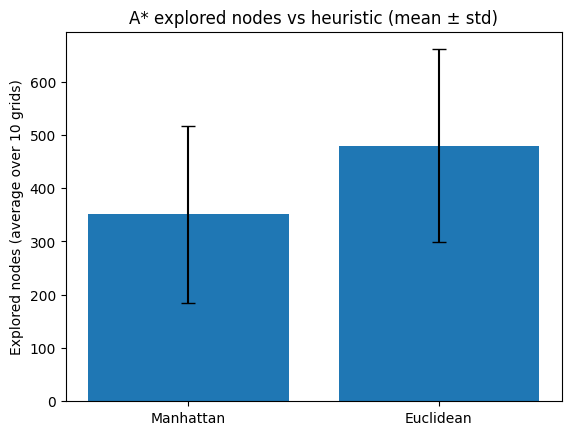

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math, heapq

def astar(grid, start, goal, h):
    n, m = grid.shape
    openpq = [(0, start)]
    g = {start: 0}
    parent = {start: None}
    explored = 0
    closed = set()

    while openpq:
        f, s = heapq.heappop(openpq)
        if s in closed:
            continue
        closed.add(s)
        explored += 1

        if s == goal:
            path = []
            while s is not None:
                path.append(s)
                s = parent[s]
            return list(reversed(path)), explored

        x, y = s
        for dx, dy in [(1,0),(-1,0),(0,1),(0,-1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < n and 0 <= ny < m and grid[nx, ny] == 0:
                ng = g[s] + 1
                if ng < g.get((nx, ny), float('inf')):
                    g[(nx, ny)] = ng
                    parent[(nx, ny)] = s
                    f_new = ng + h((nx, ny), goal)
                    heapq.heappush(openpq, (f_new, (nx, ny)))
    return None, explored

def manhattan(a, b):
    return abs(a[0]-b[0]) + abs(a[1]-b[1])

def euclid(a, b):
    return math.hypot(a[0]-b[0], a[1]-b[1])

# --- Experiment over 10 random grids ----------------------------------------

def make_grid(seed, n=30, m=30, obstacle_prob=0.25):
    np.random.seed(seed)
    grid = (np.random.rand(n, m) < obstacle_prob).astype(int)
    grid[0, 0] = 0
    grid[-1, -1] = 0
    return grid

seeds = list(range(10))
explored_M = []
explored_E = []

for s in seeds:
    grid = make_grid(s)
    start, goal = (0, 0), (grid.shape[0]-1, grid.shape[1]-1)

    _, exp_M = astar(grid, start, goal, manhattan)
    _, exp_E = astar(grid, start, goal, euclid)

    explored_M.append(exp_M)
    explored_E.append(exp_E)

explored_M = np.array(explored_M)
explored_E = np.array(explored_E)

mean_M, std_M = explored_M.mean(), explored_M.std()
mean_E, std_E = explored_E.mean(), explored_E.std()

print("Manhattan: mean explored =", mean_M, "std =", std_M)
print("Euclid:    mean explored =", mean_E, "std =", std_E)

# --- Plot bar chart with error bars -----------------------------------------

labels = ["Manhattan", "Euclidean"]
means = [mean_M, mean_E]
stds  = [std_M, std_E]

plt.figure()
x = np.arange(len(labels))
plt.bar(x, means, yerr=stds, capsize=5)
plt.xticks(x, labels)
plt.ylabel("Explored nodes (average over 10 grids)")
plt.title("A* explored nodes vs heuristic (mean ± std)")
plt.show()


**3. 1-Page reflection on completeness, optimality, time, and space**

Here, we implemented A* search on a 4-connected grid and compared how Manhattan and Euclidean heuristics influence its performance. The goal was to find a path from the top-left to the bottom-right cell while avoiding obstacles, with each step costing one unit. Both heuristics are admissible because they never overestimate the true remaining distance, ensuring that A* stays complete and optimal on a finite grid.

A* with admissible heuristics is complete because it will eventually expand all reachable states until it finds a path or proves none exists. In our tests across ten random grids, A* always found a path when one existed. It is also optimal: the first time it expands the goal, the resulting path is guaranteed to be the shortest.

The heuristics mainly influence time. When the heuristic gives a better estimate, A* explores fewer unnecessary nodes. Our experiments tracked the number of expanded nodes for each heuristic and computed the average and standard deviation over ten runs. The heuristic with fewer expansions is considered more efficient since it directs the search more effectively.

Space complexity grows with the number of explored nodes because A* stores the frontier, visited states, and parent links. Therefore, heuristics that reduce node expansions also reduce memory cost. Although Manhattan and Euclidean distances both return optimal paths, they can differ in how many states they expand depending on the obstacle layout.

Overall, this lab showed how A*’s theoretical guarantees (completeness and optimality) depend on heuristic admissibility, while practical performance depends on how well the heuristic predicts the goal distance. Measuring explored nodes across random maps helped us see these differences quantitatively.